In [10]:
import pandas as pd
import mysql.connector 
import numpy as np

In [6]:
conn=mysql.connector.connect(host='127.0.0.1',user='root',password='9192631770',database='day30')

In [8]:
query = "SELECT * FROM data"


In [9]:
df=pd.read_sql(query,conn)
df

C:\Users\EgrYt\AppData\Local\Temp\ipykernel_12216\2545783912.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,conn)


,id,address,phone,grades,name,dob
0,1,dhapakhel,1234,A,anju,2059-06-26
1,2,lagankhel,567,A+,ram,2058-06-23
2,3,satdobato,1589,B+,hari,2058-07-26
3,4,thecho,35689,B,gopal,2059-04-12
4,5,patan,34567,C+,shyam,2060-06-29


In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [13]:


# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 500

# Generate synthetic bank-related data
data = pd.DataFrame({
    'Customer_ID': np.arange(1, n_samples + 1),
    'Age': np.random.randint(18, 70, size=n_samples),                            # Age of the customer
    'Account_Balance': np.random.uniform(1000, 100000, size=n_samples),          # Account balance
    'Loan_Amount': np.random.uniform(5000, 500000, size=n_samples),              # Loan amount
    'Loan_Duration': np.random.randint(12, 360, size=n_samples),                 # Loan duration in months
    'Loan_Type': np.random.choice(['Personal', 'Home', 'Auto'], size=n_samples), # Loan type
    'Income': np.random.uniform(25000, 200000, size=n_samples),                  # Annual income
    'Marital_Status': np.random.choice(['Married', 'Single'], size=n_samples),   # Marital status
    'Target': np.random.uniform(10000, 50000, size=n_samples)                    # Target: Loan repayment amount (regression target)
})



In [15]:
# Introduce some outliers in Account_Balance and Loan_Amount
outliers = np.random.choice(data.index, size=10, replace=False)
data.loc[outliers, 'Account_Balance'] *= 10  # Inflate Account_Balance for outliers
data.loc[outliers, 'Loan_Amount'] *= 10      # Inflate Loan_Amount for outliers

# Display Loan_Amount with commas (for display purposes)


In [19]:
outliers

array([119,  87, 132, 435, 467, 317,  84,  28, 429, 319])

In [16]:
data['Loan_Amount_Display'] = data['Loan_Amount'].apply(lambda x: f"{x:,.2f}")


In [17]:

# Display the first few rows of the dataset
data[['Customer_ID', 'Age', 'Account_Balance', 'Loan_Amount_Display', 'Loan_Duration', 'Loan_Type', 'Income', 'Marital_Status', 'Target']].head()


,Customer_ID,Age,Account_Balance,Loan_Amount_Display,Loan_Duration,Loan_Type,Income,Marital_Status,Target
0,1,56,955316.627857,"2,710,108.23",66,Home,195100.932686,Married,41725.714960
1,2,69,74051.794753,"460,328.53",249,Home,131492.272722,Married,44151.396868
2,3,46,55881.051199,"176,441.27",184,Personal,86163.615115,Married,19679.085213
3,4,32,61560.353877,"176,741.83",232,Auto,44966.762355,Single,48425.079021
4,5,60,42540.406180,"370,063.12",130,Auto,51468.195029,Married,17877.028178


In [18]:
data.to_csv('outliers.csv')

In [20]:
import seaborn as sns

<Axes: >

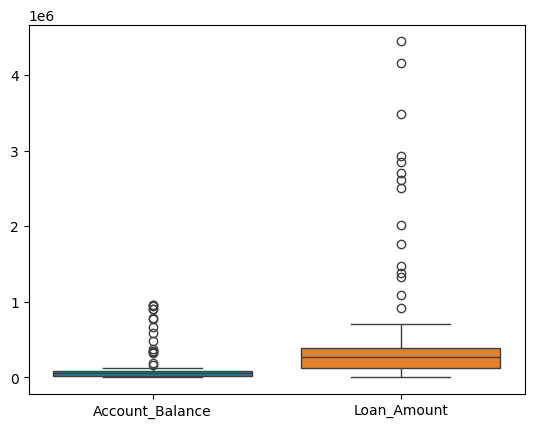

In [24]:

sns.boxplot(data[['Account_Balance','Loan_Amount']])


In [25]:

from sklearn.preprocessing import LabelEncoder

In [32]:
colstoencode=['Loan_Type','Marital_Status']
data[colstoencode] = data[colstoencode].apply(LabelEncoder().fit_transform)


In [33]:
data

,Customer_ID,Age,Account_Balance,Loan_Amount,Loan_Duration,Loan_Type,Income,Marital_Status,Target,Loan_Amount_Display
0,1,56,955316.627857,2.710108e+06,66,1,195100.932686,0,41725.714960,"2,710,108.23"
1,2,69,74051.794753,4.603285e+05,249,1,131492.272722,0,44151.396868,"460,328.53"
2,3,46,55881.051199,1.764413e+05,184,2,86163.615115,0,19679.085213,"176,441.27"
3,4,32,61560.353877,1.767418e+05,232,0,44966.762355,1,48425.079021,"176,741.83"
4,5,60,42540.406180,3.700631e+05,130,0,51468.195029,0,17877.028178,"370,063.12"
...,...,...,...,...,...,...,...,...,...,...
495,496,65,34184.526923,3.487428e+04,106,1,26551.074895,1,23345.135833,"34,874.28"
496,497,42,80482.491411,1.273161e+05,281,2,199618.649744,0,41662.328104,"127,316.10"
497,498,57,1458.570277,8.397462e+04,332,2,143443.727300,0,28051.764521,"83,974.62"
498,499,62,34016.417997,4.365329e+05,121,0,169982.127404,1,17337.687856,"436,532.87"


In [ ]:
#boxplot,zscore plot,iqr plot